In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.


In [3]:
df_BANK_cliente=df['BANK_marketing']

In [5]:

df_BANK_vista_cliente=df_BANK_cliente[['id','age','job','marital','education','balance','housing','loan','deposit']]

C:\Users\ereth\AppData\Local\Temp\ipykernel_23656\3397031591.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_cliente['age_group'] = pd.cut(df_BANK_vista_cliente['age'],


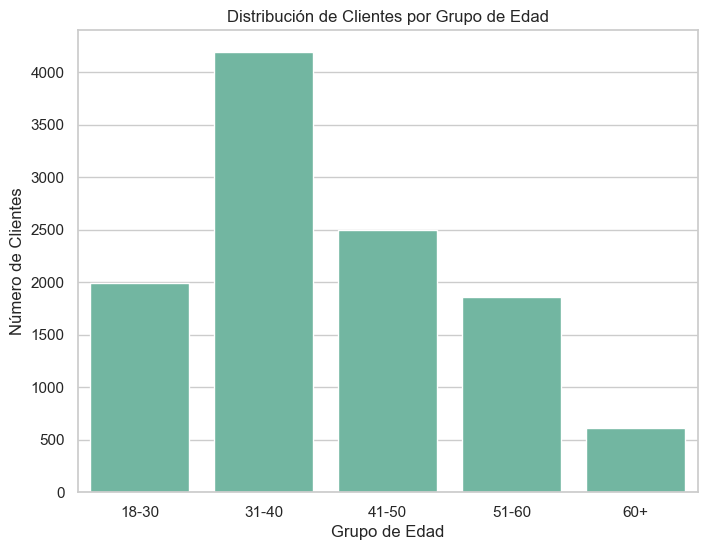

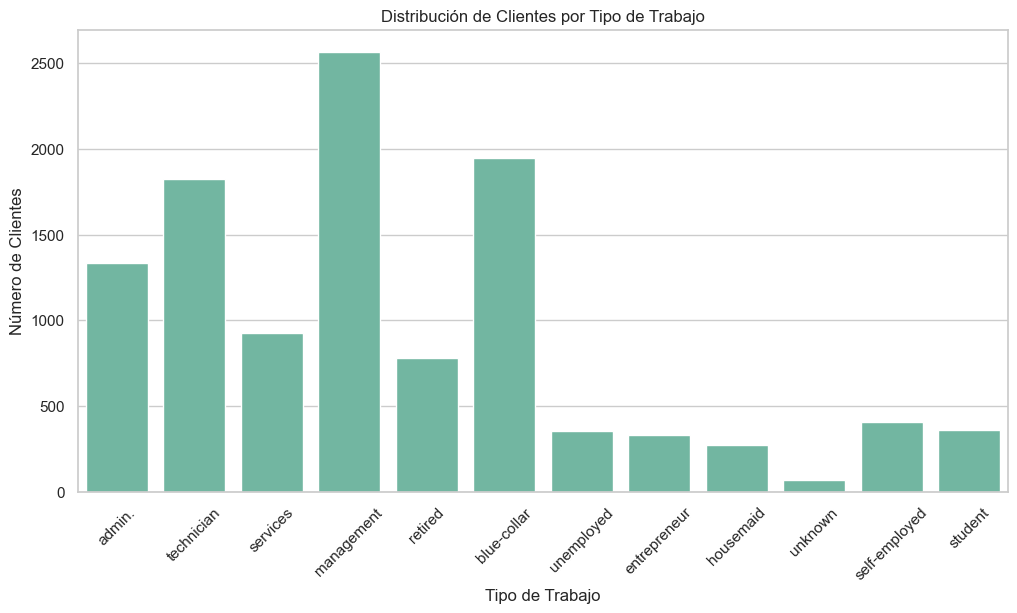

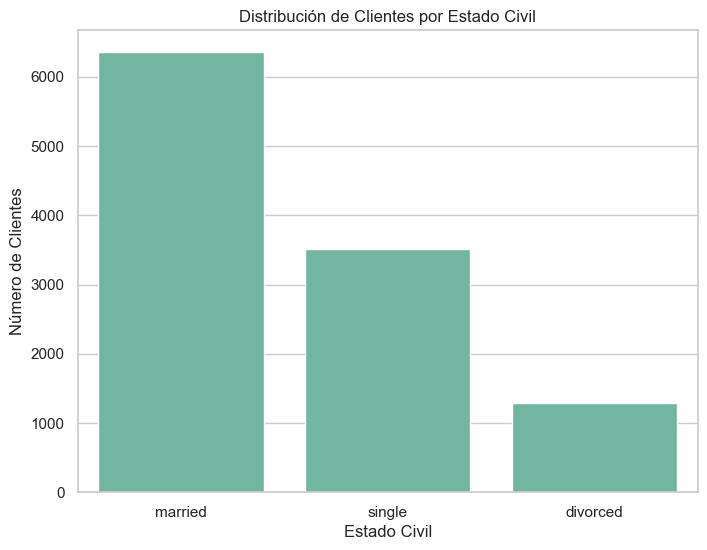

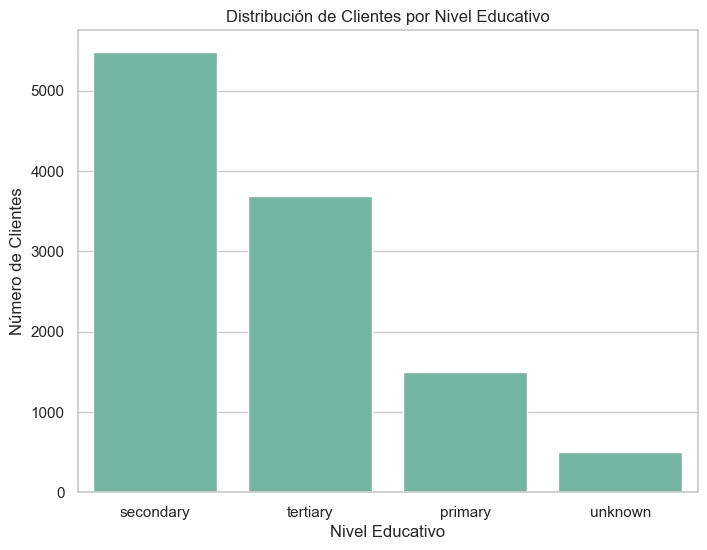

C:\Users\ereth\AppData\Local\Temp\ipykernel_23656\3397031591.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_rate = data.groupby(category)[target].mean().reset_index()


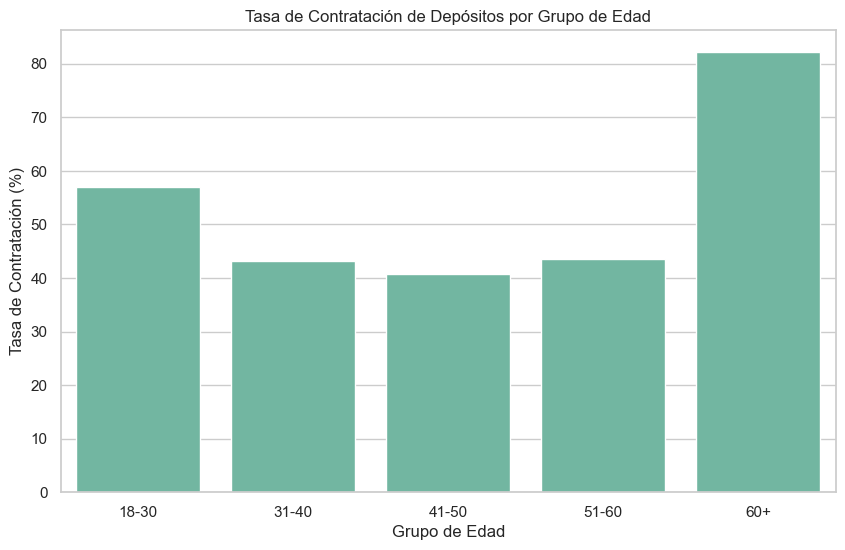

C:\Users\ereth\AppData\Local\Temp\ipykernel_23656\3397031591.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_rate = data.groupby(category)[target].mean().reset_index()


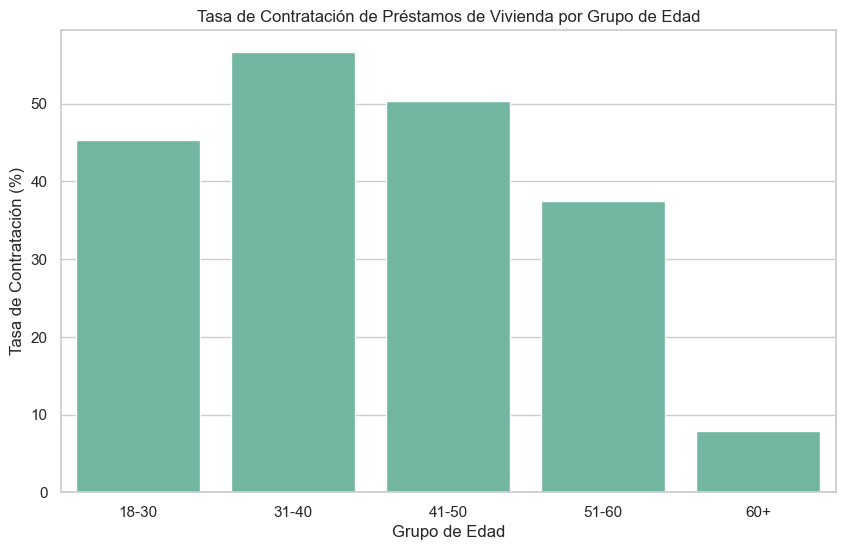

C:\Users\ereth\AppData\Local\Temp\ipykernel_23656\3397031591.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_rate = data.groupby(category)[target].mean().reset_index()


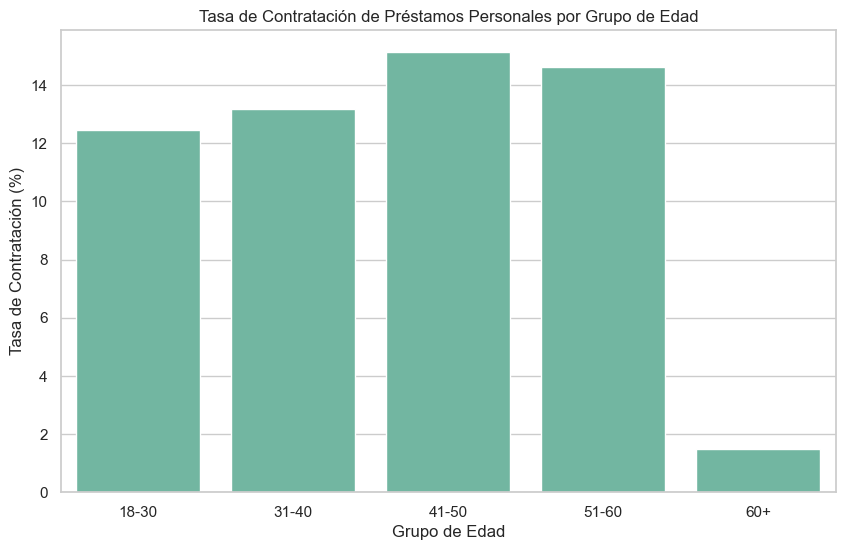

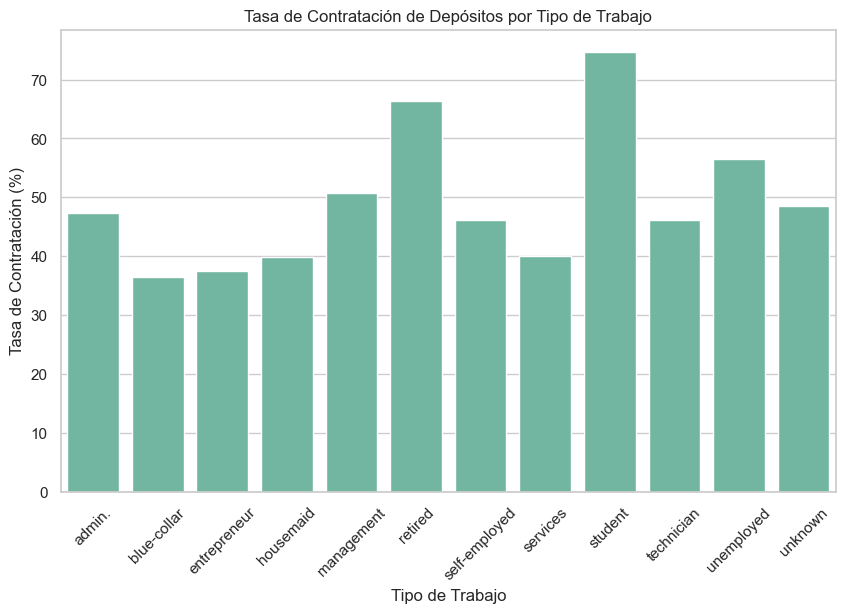

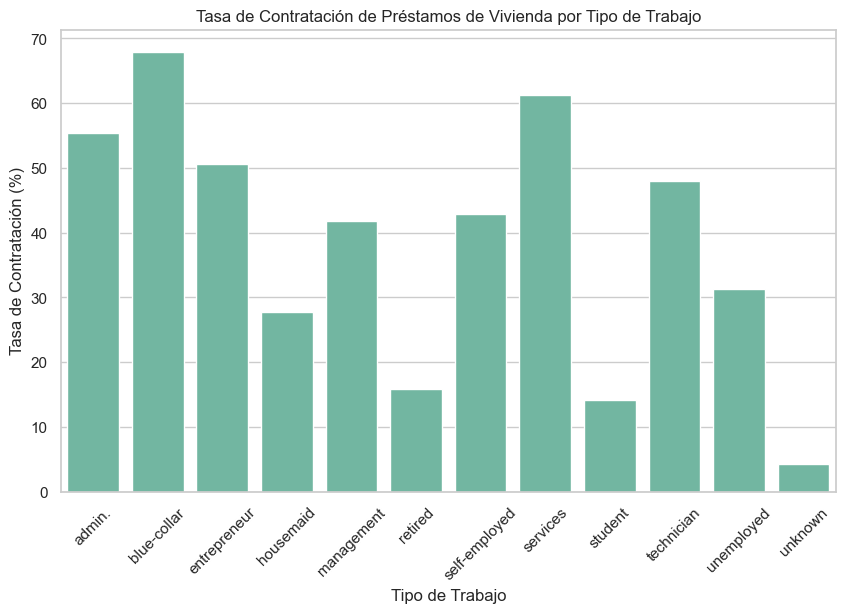

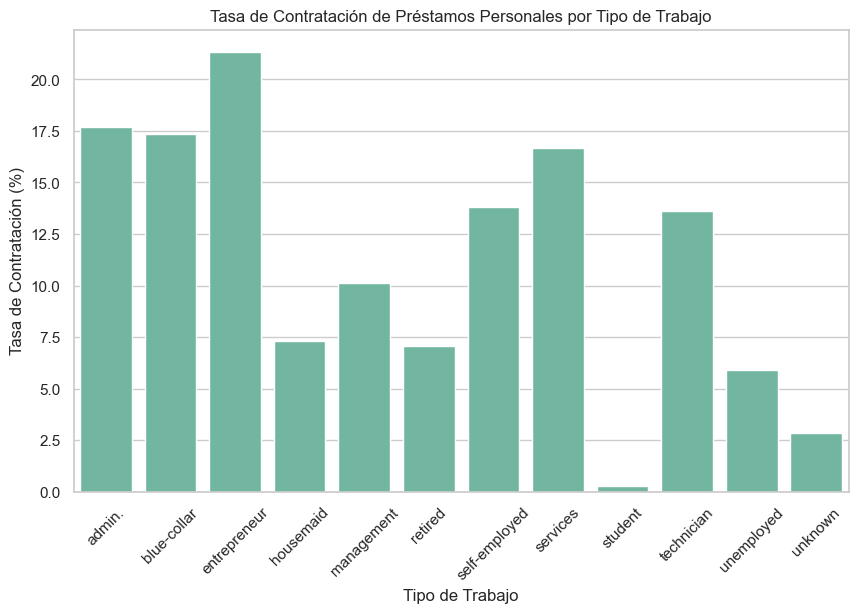

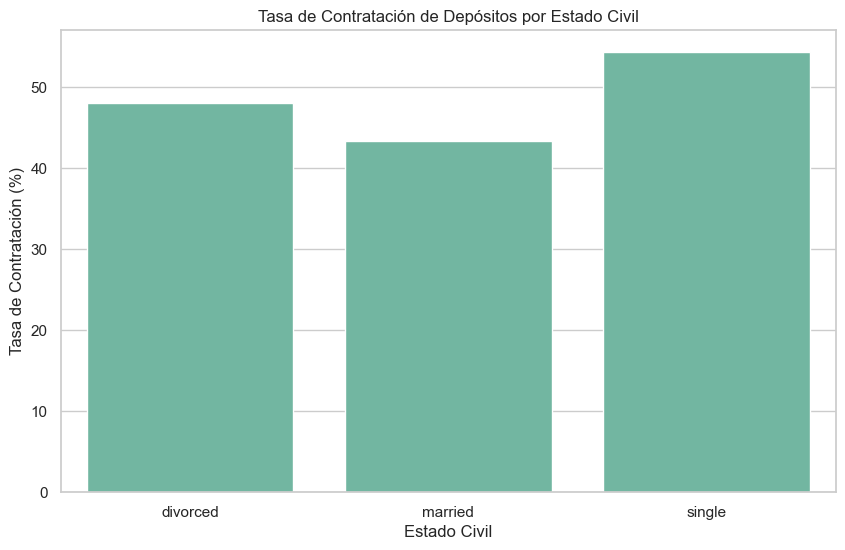

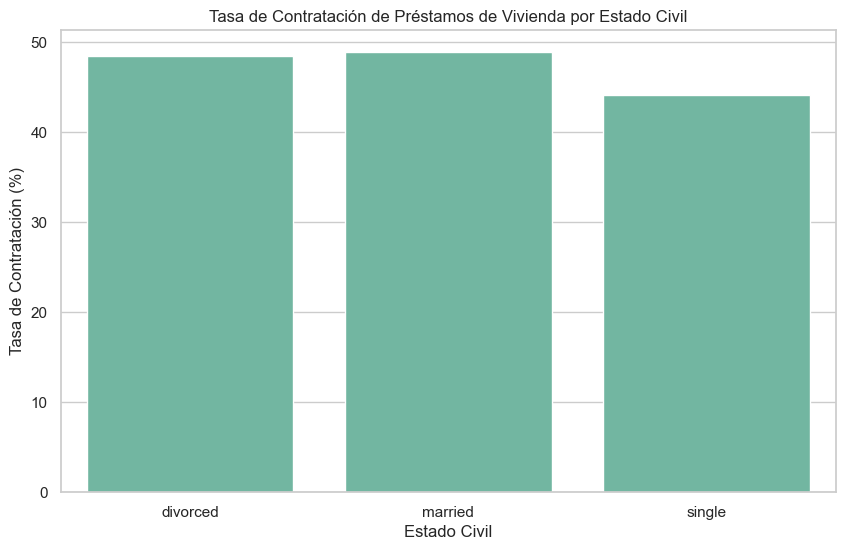

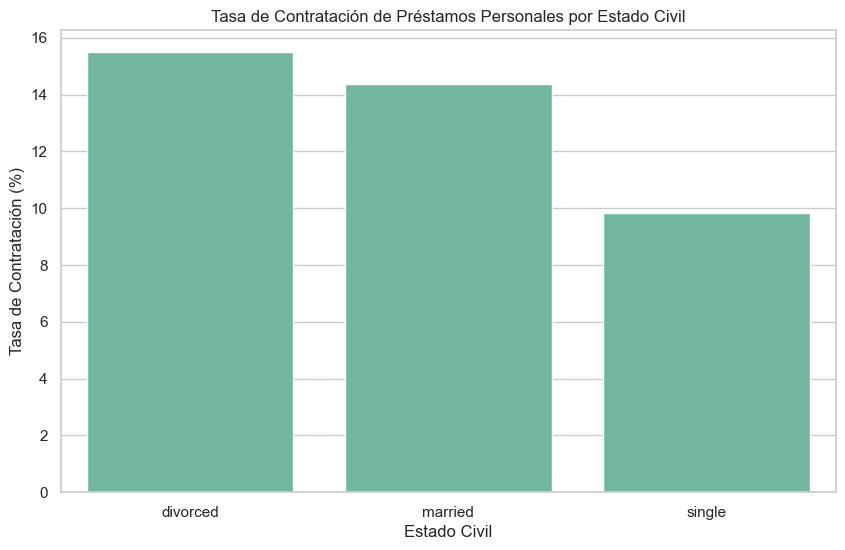

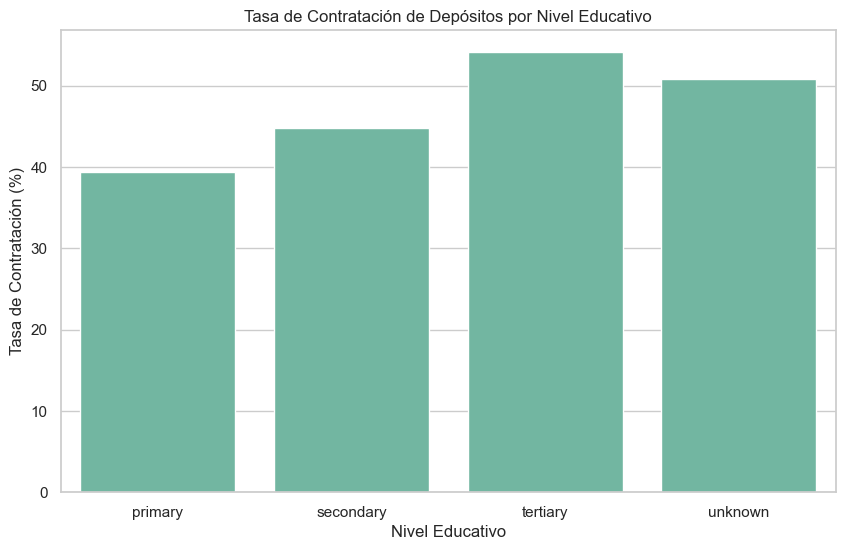

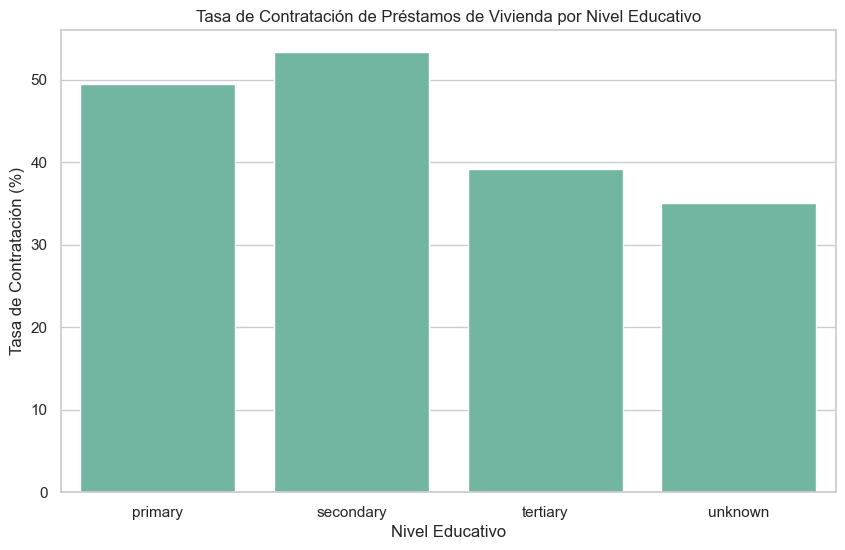

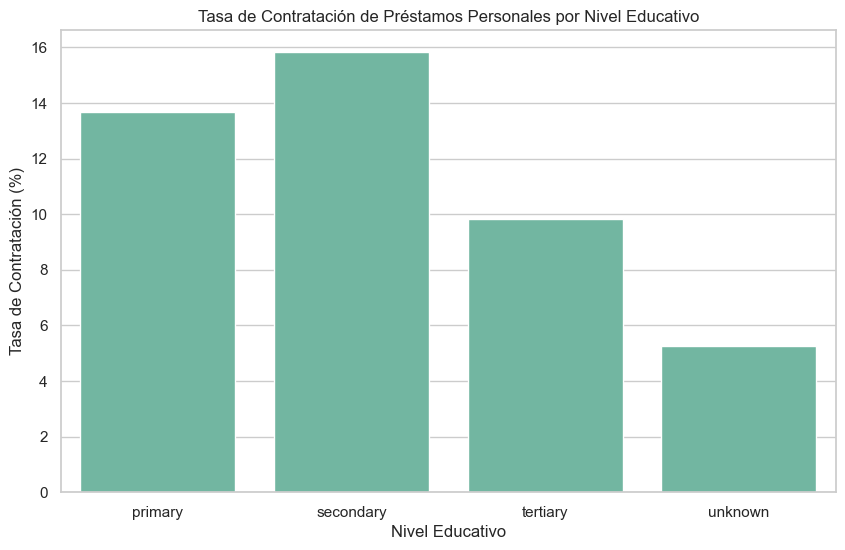

In [13]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos los gráficos
sns.set(style='whitegrid', palette='Set2')

# =====================
# Función para Calcular la Tasa de Contratación 
# =====================
def plot_contract_rate(data, category, target, title, xlabel, rotate_labels=False):
    # Calculamos la tasa de contratación
    contract_rate = data.groupby(category)[target].mean().reset_index()
    contract_rate[target] = contract_rate[target] * 100  # Convertimos en porcentaje
    
    # Graficamos la tasa de contratación
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y=target, data=contract_rate)
    plt.title(title)
    plt.ylabel('Tasa de Contratación (%)')
    plt.xlabel(xlabel)
    
    # Rotamos las etiquetas si es necesario
    if rotate_labels:
        plt.xticks(rotation=45)
    
    plt.show()

# =====================
# Creación de Grupos de Edad
# =====================
df_BANK_vista_cliente['age_group'] = pd.cut(df_BANK_vista_cliente['age'], 
                                            bins=[18, 30, 40, 50, 60, 100], 
                                            labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# =====================
# Gráficos de Distribución de Variables Categóricas
# =====================

# 1. Distribución de Clientes por Grupo de Edad
plt.figure(figsize=(8, 6))
sns.countplot(data=df_BANK_vista_cliente, x='age_group')
plt.title('Distribución de Clientes por Grupo de Edad')
plt.ylabel('Número de Clientes')
plt.xlabel('Grupo de Edad')
plt.show()

# 2. Distribución de Clientes por Tipo de Trabajo 
plt.figure(figsize=(12, 6))
sns.countplot(data=df_BANK_vista_cliente, x='job')
plt.title('Distribución de Clientes por Tipo de Trabajo')
plt.ylabel('Número de Clientes')
plt.xlabel('Tipo de Trabajo')
plt.xticks(rotation=45)  # Rotamos las etiquetas
plt.show()

# 3. Distribución de Clientes por Estado Civil
plt.figure(figsize=(8, 6))
sns.countplot(data=df_BANK_vista_cliente, x='marital')
plt.title('Distribución de Clientes por Estado Civil')
plt.ylabel('Número de Clientes')
plt.xlabel('Estado Civil')
plt.show()

# 4. Distribución de Clientes por Nivel Educativo
plt.figure(figsize=(8, 6))
sns.countplot(data=df_BANK_vista_cliente, x='education')
plt.title('Distribución de Clientes por Nivel Educativo')
plt.ylabel('Número de Clientes')
plt.xlabel('Nivel Educativo')
plt.show()

# =====================
# Análisis de Tasa de Contratación por Categorías Demográficas
# =====================

# 1. Tasa de Contratación por Grupo de Edad
plot_contract_rate(df_BANK_vista_cliente, 'age_group', 'deposit', 
                   'Tasa de Contratación de Depósitos por Grupo de Edad', 
                   'Grupo de Edad')

plot_contract_rate(df_BANK_vista_cliente, 'age_group', 'housing', 
                   'Tasa de Contratación de Préstamos de Vivienda por Grupo de Edad', 
                   'Grupo de Edad')

plot_contract_rate(df_BANK_vista_cliente, 'age_group', 'loan', 
                   'Tasa de Contratación de Préstamos Personales por Grupo de Edad', 
                   'Grupo de Edad')

# 2. Tasa de Contratación por Tipo de Trabajo (con rotación de etiquetas)
plot_contract_rate(df_BANK_vista_cliente, 'job', 'deposit', 
                   'Tasa de Contratación de Depósitos por Tipo de Trabajo', 
                   'Tipo de Trabajo', rotate_labels=True)

plot_contract_rate(df_BANK_vista_cliente, 'job', 'housing', 
                   'Tasa de Contratación de Préstamos de Vivienda por Tipo de Trabajo', 
                   'Tipo de Trabajo', rotate_labels=True)

plot_contract_rate(df_BANK_vista_cliente, 'job', 'loan', 
                   'Tasa de Contratación de Préstamos Personales por Tipo de Trabajo', 
                   'Tipo de Trabajo', rotate_labels=True)

# 3. Tasa de Contratación por Estado Civil
plot_contract_rate(df_BANK_vista_cliente, 'marital', 'deposit', 
                   'Tasa de Contratación de Depósitos por Estado Civil', 
                   'Estado Civil')

plot_contract_rate(df_BANK_vista_cliente, 'marital', 'housing', 
                   'Tasa de Contratación de Préstamos de Vivienda por Estado Civil', 
                   'Estado Civil')

plot_contract_rate(df_BANK_vista_cliente, 'marital', 'loan', 
                   'Tasa de Contratación de Préstamos Personales por Estado Civil', 
                   'Estado Civil')

# 4. Tasa de Contratación por Nivel Educativo
plot_contract_rate(df_BANK_vista_cliente, 'education', 'deposit', 
                   'Tasa de Contratación de Depósitos por Nivel Educativo', 
                   'Nivel Educativo')

plot_contract_rate(df_BANK_vista_cliente, 'education', 'housing', 
                   'Tasa de Contratación de Préstamos de Vivienda por Nivel Educativo', 
                   'Nivel Educativo')

plot_contract_rate(df_BANK_vista_cliente, 'education', 'loan', 
                   'Tasa de Contratación de Préstamos Personales por Nivel Educativo', 
                   'Nivel Educativo')

#

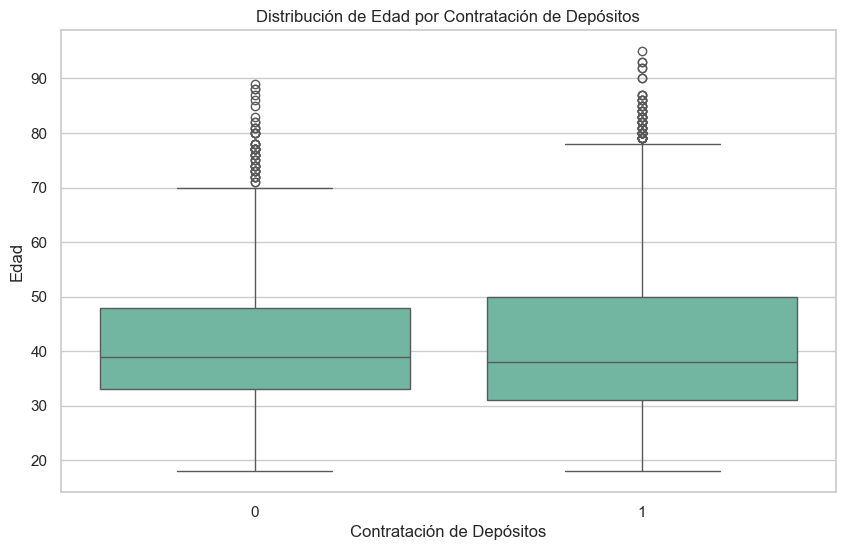

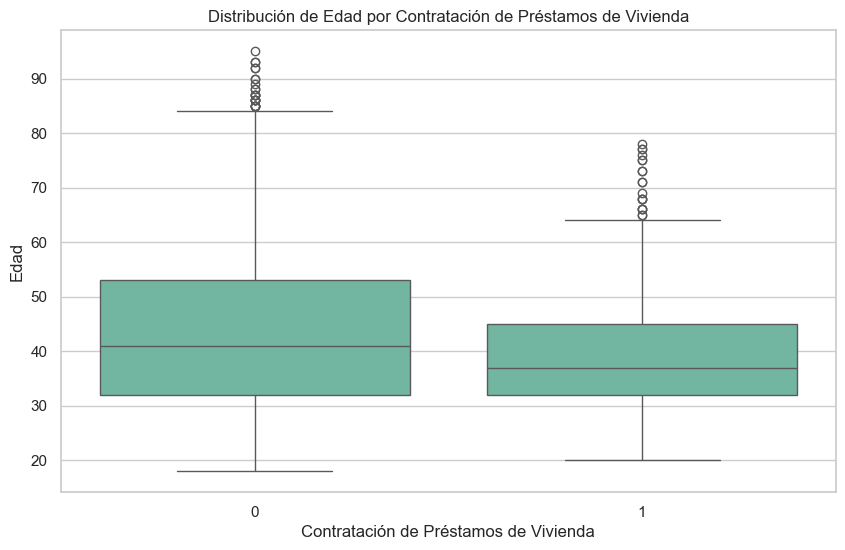

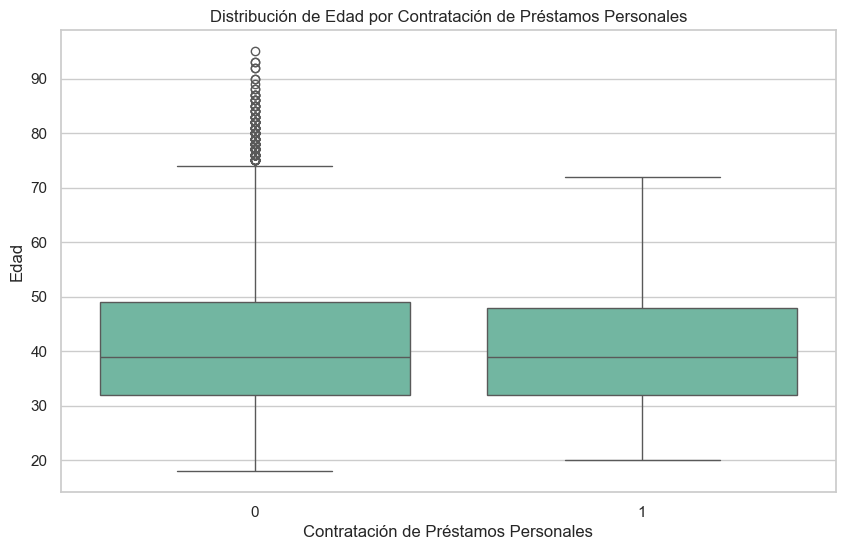

In [15]:
# =====================
# Boxplots para Analizar la Distribución de Edad por Contratación de Productos Financieros
# =====================

# 1. Boxplot de Edad por Contratación de Depósitos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_BANK_vista_cliente, x='deposit', y='age')
plt.title('Distribución de Edad por Contratación de Depósitos')
plt.ylabel('Edad')
plt.xlabel('Contratación de Depósitos')
plt.show()

# 2. Boxplot de Edad por Contratación de Préstamos de Vivienda
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_BANK_vista_cliente, x='housing', y='age')
plt.title('Distribución de Edad por Contratación de Préstamos de Vivienda')
plt.ylabel('Edad')
plt.xlabel('Contratación de Préstamos de Vivienda')
plt.show()

# 3. Boxplot de Edad por Contratación de Préstamos Personales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_BANK_vista_cliente, x='loan', y='age')
plt.title('Distribución de Edad por Contratación de Préstamos Personales')
plt.ylabel('Edad')
plt.xlabel('Contratación de Préstamos Personales')
plt.show()
